In [1]:
import numpy
from matplotlib import pyplot, rcParams

%matplotlib inline

In [2]:
def plot_cext_wave_distance(wavelength, cext, linestyles, colors, labels, title=None):
    '''Plots the cross extinction section as a function of wavelength for
    different values of distance at which the proteins are located.

  	Arguments:
    ----------
    wavelength: list of wavelength arrays for each distance case.
    cext      : list of cross extinction section arrays for each distance case.
    linestyles: list of linstyles we desire to use for each distance case.
    colors    : list of colors we desire to use for each distance case.
    labels    : list of labels we desire to use for each distance case.
	'''
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 16
    rcParams['xtick.top'] = True
    rcParams['ytick.right'] = True
    rcParams['axes.linewidth'] = 2

    fig=pyplot.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)
    
    major_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 11)
    minor_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 21)
    #major_yticks = numpy.linspace(0, 8000, 9)
    #minor_yticks = numpy.linspace(0, 8000, 33)

    ax.set_xticks(major_xticks)                                                       
    ax.set_xticks(minor_xticks, minor=True)
    #ax.set_yticks(major_yticks)                                                       
    #ax.set_yticks(minor_yticks, minor=True)

    pyplot.xticks(rotation=25)
    pyplot.tick_params(axis='both', length=5, width=1, which='major', direction='in')
    pyplot.tick_params(axis='both', length=2.5, width=1, which='minor', direction='in')

    pyplot.xlabel('Wavelength [nm]')
    pyplot.ylabel('Cross extinction section [$nm^2$]')
    pyplot.xlim(382,387)
    #pyplot.ylim(0,8000)
    pyplot.grid(ls=':', which='minor', alpha=0.6)
    pyplot.grid(ls=':', which='major', alpha=0.8)
    #pyplot.title('Silver sphere with BSA Proteins')
    
    for i in range(len(wavelength)):
        pyplot.plot(wavelength[i], cext[i], linestyle=linestyles[i], 
                   color=colors[i], linewidth=2, label=labels[i])
    
    pyplot.legend(loc='best')

    if title:
        fig.tight_layout()
        pyplot.savefig('figures/'+title+'.pdf', dpi=80, format='pdf')

In [3]:
def report(sensor_file, bsa_file, fig_name=None):
    '''
    '''
    w_d1_00 , Cext_d1_00 = numpy.loadtxt(sensor_file, unpack = True)
    w_d1_2p_00 , Cext_d1_2p_00 = numpy.loadtxt(bsa_file, unpack = True)
    
    wavelength_d1_2p_00 = [w_d1_00/10., w_d1_2p_00/10.]
    cext_d1_00 = [Cext_d1_00, Cext_d1_2p_00]
    linestyles = ['-', ':']
    colors = ['k', '0.6']
    labels = ['$d = \infty$', '$d=1 \,nm$']
    
    plot_cext_wave_distance(wavelength_d1_2p_00, cext_d1_00, linestyles, colors, labels, title=fig_name)
    
    lab = ['d=infty', 'd=1 nm']
    lst = list(zip(cext_d1_00, lab))
    for i in range(len(lst)):
        c, l = lst[i]
        idx = numpy.where(c==max(c))
        print('Cext max at {} is {} and it occurs at a wavelength of {}'.format(l, max(c), w_d1_00[idx][0]))

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm

In [4]:
s_file_0 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2pz/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_0 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2pz/BSA_sensorR80_2pz_d=1_00_ef0.0037_total.txt'
fig_name_0 = '2pz_00_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3901.06202839 and it occurs at a wavelength of 3845.0


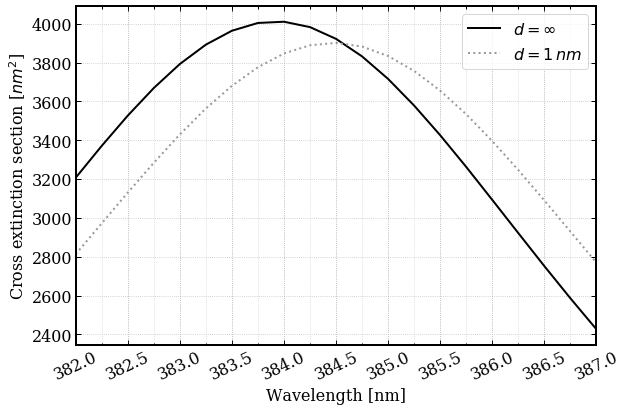

In [5]:
report(s_file_0, p_file_0, fig_name_0)

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm dipole tilt 30 deg 
## (RH rule z axis)

In [6]:
s_file_30 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_30/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_30 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_30/BSA_sensorR80_2pz_d=1_tilt_30_total.txt'
fig_name_30 = '2pz_30_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3901.29154274 and it occurs at a wavelength of 3845.0


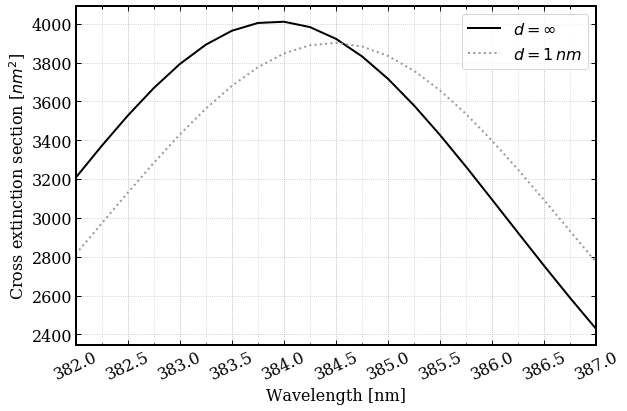

In [7]:
report(s_file_30, p_file_30, fig_name_30)

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm tilt 45 deg

In [8]:
s_file_45 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_45/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_45 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_45/BSA_sensorR80_2pz_d=1_tilt_45_total.txt'
fig_name_45 = '2pz_45_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3901.12117915 and it occurs at a wavelength of 3845.0


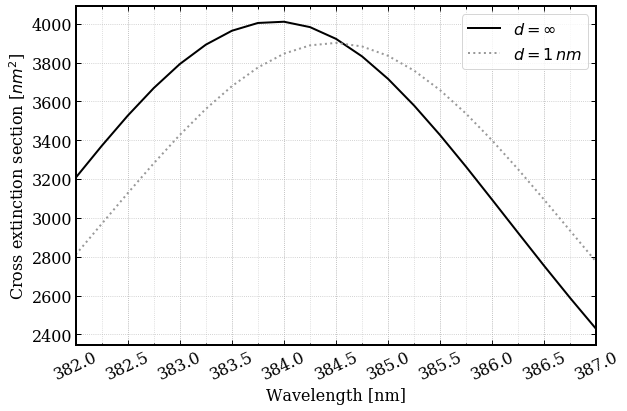

In [9]:
report(s_file_45, p_file_45, fig_name_45)

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm dipole tilt 30 deg 
## (RH rule x axis)

In [10]:
s_file_30_x = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_30_x/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_30_x = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_tilt_30_x/BSA_sensorR80_2pz_d=1_tilt_30_x_total.txt'
fig_name_30_x = '2pz_30_x_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3903.53850794 and it occurs at a wavelength of 3845.0


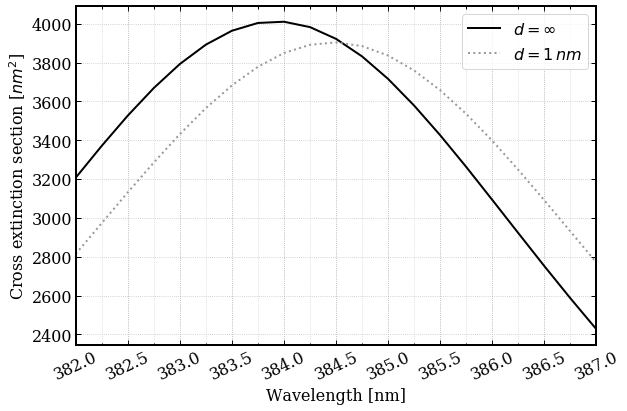

In [11]:
report(s_file_30_x, p_file_30_x, fig_name_30_x)

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm rot 45 deg

In [10]:
s_file_rot_45 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_rot_45/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_rot_45 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_rot_45/BSA_sensorR80_2pz_d=1_rot_45_total.txt'
fig_name_rot_45 = '2pz_rot_45_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3937.91661669 and it occurs at a wavelength of 3842.5


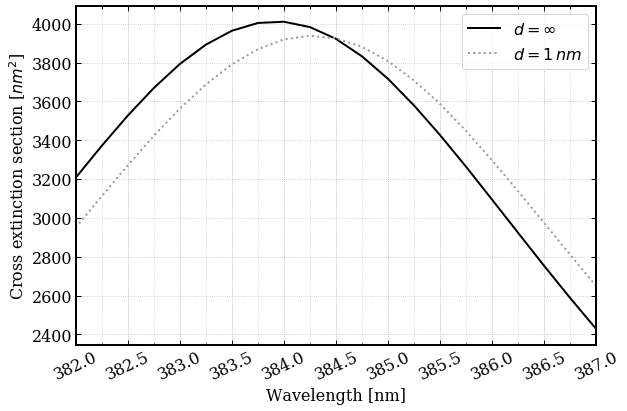

In [11]:
report(s_file_rot_45, p_file_rot_45, fig_name_rot_45)

# Case d=1 nm at +/-z 2 proteins   EF -0.0037,  R8 nm rot 90 deg

In [12]:
s_file_rot_90 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_rot_90/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_rot_90 = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_2pz_d=1_rot_90/BSA_sensorR80_2pz_d=1_rot_90_total.txt'
fig_name_rot_90 = '2pz_rot_90_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3943.76489942 and it occurs at a wavelength of 3842.5


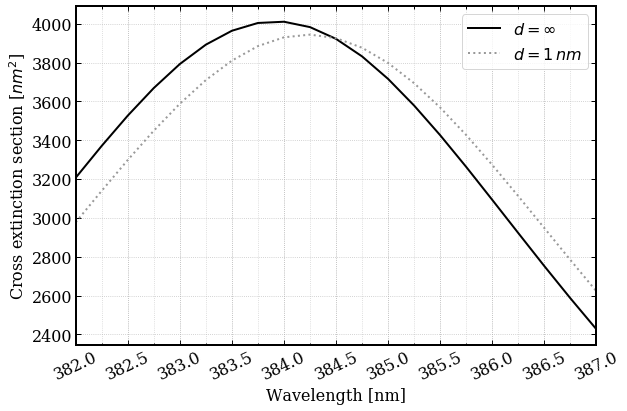

In [13]:
report(s_file_rot_90, p_file_rot_90, fig_name_rot_90)

# Case d=1 nm at +/-x 2 proteins   EF -0.0037,  R8 nm 

In [14]:
s_file_x = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2px/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_x = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2px/BSA_sensorR80_2px_d=1_00_total.txt'
fig_name_x = '2px_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3979.0490072 and it occurs at a wavelength of 3840.0


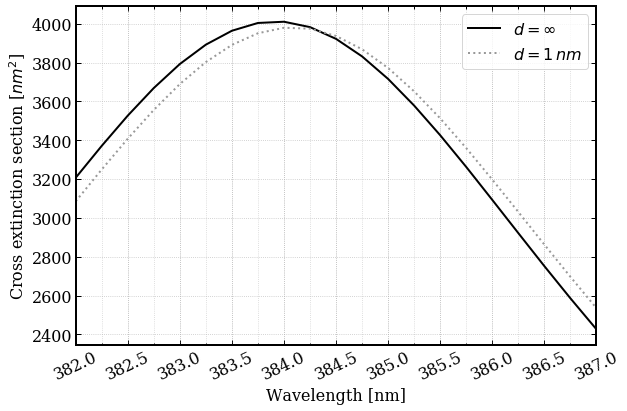

In [15]:
report(s_file_x, p_file_x, fig_name_x)

# Case d=1 nm at +/-y 2 proteins   EF -0.0037,  R8 nm 

In [16]:
s_file_y = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2py/BSA_sensorR80_d=infty_ef0.0037_total.txt'
p_file_y = '../data/wave_cext_d_prot_sensor/test_join_sort/BSA_sensorR80_d=1_2py/BSA_sensorR80_2py_d=1_00_total.txt'
fig_name_y = '2py_ef-0.0037_R8nm'

Cext max at d=infty is 4010.09400027 and it occurs at a wavelength of 3840.0
Cext max at d=1 nm is 3985.95109048 and it occurs at a wavelength of 3840.0


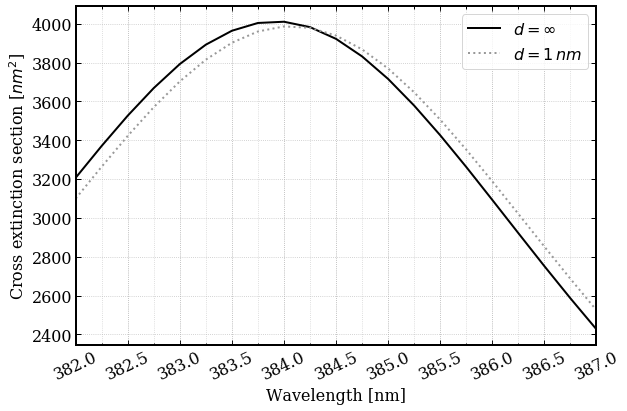

In [17]:
report(s_file_y, p_file_y, fig_name_y)